# *Klasifikasi Kondisi Tubuh Mahasiswa Teknologi Sains Data Angkatan 2021 Universitas Airlangga berdasarkan Survei Kesehatan menggunakan Model Machine Learning*

# Deskripsi Dataset
Dataset yang digunakan dalam pembangunan *model machine learning* ini adalah *Data Kesehatan Mahasiswa Teknologi Sains Data Angkatan 2021 Universitas Airlangga*. Data ini diperoleh dengan melakukan survei terhadap 61 Mahasiswa TSD'21 UA dari 114 Mahasiswa yang ada. Teknik sampling yang digunakan untuk memeroleh data primer yakni *Quota Sampling*, di mana kelompok kami menetapkan jumlah sampel sebanyak 61.
Adapun terdapat 18 pertanyaan yang diajukan kepada responden dan 18 pertanyaan ini akan digunakan sebagai feature untuk analisis klasifikasi lebih lanjut. Berikut detail informasi dari feature yang dipakai;

1. nama: Identitas dari responden,
2. jenis_kelamin (Biner): Perempuan atau Laki-laki,
3. jam_makan_teratur (Biner): Berupa opsi Ya atau Tidak,
4. perokok (Biner): Berupa opsi Ya atau Tidak,
5. diet (Biner): Berupa opsi Ya atau Tidak terhadap menjalankan program diet,
6. konsumsi_obat_rutin (Biner): Berupa opsi Ya atau Tidak terhadap konsumsi obat maupun suplemen secara rutin,
7. makan_malam (Biner): Berupa opsi Ya atau Tidak jika makan malam di atas jam 19.00,
8. frekuensi_buah_mingguan (Ordinal): Tingkatan 1 sampai 4*,
9. frekuensi_sayur_mingguan (Ordinal): Tingkatan 1 sampai 4*,
10. tingkat_stress (Ordinal): Perkiraan kondisi stress dan berupa tingkatan 1 sampai 4**,
11. tinggi_badan (numerik): Tinggi badan dalam satuan cm,
12.	berat_badan	(numerik): Berat badan dalam satuan kg,
13. jumlah_makan_harian	(numerik): Jumlah makan per-harinya,
14. jumlah_olahraga_mingguan (numerik):	Jumlah melakukan aktivitas olahraga setiap minggunya dengan satuan hari,
15. jumlah_jam_tidur (numerik):	Jumlah jam tidur per-harinya dengan satuan jam,
16. jum_makan_luar_mingguan	(numerik): Jumlah membeli makanan dari luar per-minggunya,
17. jum_masak_mingguan (numerik): Jumlah melakukan masak per-minggunya,	dan
18. jumlah_gelas_susu (numerik): Jumlah susu yang dikonsumsi per-minggunya  dalam satuan gelas.

*) 1. Tidak Pernah;
2. Jarang;
3. Normal;
4. Sering.

**) 1. Tidak Stress;
2. Sedikit Stress;
3. Stress;
4. Sangat Stress.

# **Members of Group 3:**
1. Diaz Arvinda Ardian (162112133009)
1. Vaness Nakanaori Tejonegoro (162112133067)
2. Fransiscus Ernest Oktafiano (162112133081)
3. Aditya Ananda (162112133095)
4. Stevanus Sembiring (162112133099)



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Import Library

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.naive_bayes import GaussianNB

# Import Dataset

In [ ]:
df_raw = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/health_tsd_students.csv')
df_raw.head(10)

no           nama jenis_kelamin jam_makan_teratur perokok   diet  \
0   1       Dimyadi      Laki-laki             Tidak   Tidak  Tidak   
1   2           Azhy     Laki-laki             Tidak   Tidak  Tidak   
2   3    Kenang Alfa     Laki-laki                Ya   Tidak  Tidak   
3   4         Moreno     Laki-laki                Ya   Tidak     Ya   
4   5  master of GKB     Laki-laki             Tidak   Tidak  Tidak   
5   6            Lim     Laki-laki                Ya   Tidak     Ya   
6   7          ayang     Perempuan                Ya   Tidak  Tidak   
7   8      coupstatu     Perempuan                Ya   Tidak  Tidak   
8   9           Murf     Laki-laki             Tidak      Ya  Tidak   
9  10         shinta     Perempuan             Tidak   Tidak     Ya   

  konsumsi_obat_rutin makan_malam  frekuensi_buah_mingguan  \
0               Tidak          Ya                        2   
1               Tidak          Ya                        2   
2                  Ya       Tidak                        3   
3               Tidak          Ya                        4   
4               Tidak       Tidak                        1   
5               Tidak          Ya                        2   
6               Tidak          Ya                        2   
7               Tidak       Tidak                        3   
8               Tidak          Ya                        2   
9               Tidak          Ya                        2   

   frekuensi_sayur_mingguan  tingkat_stress  tinggi_badan  berat_badan  \
0                         2               2           165         49.0   
1                         4               3           165         48.0   
2                         3               1           175         55.0   
3                         4               2           163         56.0   
4                         3               4           172         65.0   
5                         4               4           164         45.0   
6                         4               1           157         55.0   
7                         3               2           169         65.0   
8                         2               3           169         48.0   
9                         3               1           163         57.0   

   jumlah_makan_harian  jumlah_olahraga_mingguan  jumlah_jam_tidur  \
0                    2                       1.0                 5   
1                    2                       2.0                 6   
2                    3                       2.0                 6   
3                    3                       4.0                 6   
4                    3                       0.0                 7   
5                    2                       2.0                 6   
6                    2                       0.0                 4   
7                    2                       3.0                 7   
8                    2                       3.0                 8   
9                    2                       0.0                 5   

   jum_makan_luar_mingguan  jum_masak_mingguan  jumlah_gelas_susu  \
0                        3                  11                  2   
1                       14                   0                  4   
2                        5                   0                  5   
3                        5                   7                  6   
4                       10                  11                  0   
5                       14                   0                  1   
6                        5                   7                  2   
7                        3                   5                  3   
8                        3                   3                  0   
9                        2                   5                  0   

  kategori_tubuh  
0    Tidak Ideal  
1    Tidak Ideal  
2    Tidak Ideal  
3          Ideal  
4          Ideal  
5    Tidak Ideal  
6          Ideal  
7          Ideal  
8    Tidak Ideal  
9 

# Data Preprocessing

### 1. Pengecekan Missing-Values

In [ ]:
# Cek Missing-Values
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   no                        61 non-null     int64  
 1   nama                      61 non-null     object 
 2   jenis_kelamin             61 non-null     object 
 3   jam_makan_teratur         61 non-null     object 
 4   perokok                   61 non-null     object 
 5   diet                      61 non-null     object 
 6   konsumsi_obat_rutin       61 non-null     object 
 7   makan_malam               61 non-null     object 
 8   frekuensi_buah_mingguan   61 non-null     int64  
 9   frekuensi_sayur_mingguan  61 non-null     int64  
 10  tingkat_stress            61 non-null     int64  
 11  tinggi_badan              61 non-null     int64  
 12  berat_badan               61 non-null     float64
 13  jumlah_makan_harian       61 non-null     int64  
 14  jumlah_olahr

Seluruh *feature* tidak mengandung *missing-values* sehingga tidak diperlukan *handling missing-values*.

## 2. Features Engineering

In [ ]:
# Menghapus feature yang tidak diperlukan
df_raw = df_raw.drop(['no','nama'], axis=1)

In [ ]:
from sklearn.preprocessing import LabelEncoder
#create instance of label encoder
lab = LabelEncoder()

# Melakukan penggantian nilai features kualitatif dengan Label Encoder
df_raw['jenis_kelamin'] = lab.fit_transform(df_raw['jenis_kelamin'])
df_raw['jam_makan_teratur'] = lab.fit_transform(df_raw['jam_makan_teratur'])
df_raw['perokok'] = lab.fit_transform(df_raw['perokok'])
df_raw['diet'] = lab.fit_transform(df_raw['diet'])
df_raw['konsumsi_obat_rutin'] = lab.fit_transform(df_raw['konsumsi_obat_rutin'])
df_raw['makan_malam'] = lab.fit_transform(df_raw['makan_malam'])

# Target feature
df_raw['kategori_tubuh'] = lab.fit_transform(df_raw['kategori_tubuh'])

# Data hasil Label Encoder
df_raw.head(5)

jenis_kelamin  jam_makan_teratur  perokok  diet  konsumsi_obat_rutin  \
0              0                  0        0     0                    0   
1              0                  0        0     0                    0   
2              0                  1        0     0                    1   
3              0                  1        0     1                    0   
4              0                  0        0     0                    0   

   makan_malam  frekuensi_buah_mingguan  frekuensi_sayur_mingguan  \
0            1                        2                         2   
1            1                        2                         4   
2            0                        3                         3   
3            1                        4                         4   
4            0                        1                         3   

   tingkat_stress  tinggi_badan  berat_badan  jumlah_makan_harian  \
0               2           165         49.0                    2   
1               3           165         48.0                    2   
2               1           175         55.0                    3   
3               2           163         56.0                    3   
4               4           172         65.0                    3   

   jumlah_olahraga_mingguan  jumlah_jam_tidur  jum_makan_luar_mingguan  \
0                       1.0                 5                        3   
1                       2.0                 6                       14   
2                       2.0                 6                        5   
3                       4.0                 6                        5   
4                       0.0                 7                       10   

   jum_masak_mingguan  jumlah_gelas_susu  kategori_tubuh  
0                  11                  2               1  
1                   0                  4               1  
2                   0                  5               1  
3                   7                  6               0  
4                  11                  0               0

Berikut keterangan hasil Label Encoder:
1. jenis_kelamin (0: Laki-Laki & 1: Perempuan)
2. jam_makan_teratur (0: Tidak & 1: Ya)
3. perokok (0: Tidak & 1: Ya)
4. diet (0: Tidak & 1: Ya)
5. konsumsi_obat_rutin (0: Tidak & 1: Ya)
6. makan_malam (0: Tidak & 1: Ya)
7. kategori_tubuh (0: Ideal & 1: Tidak Ideal)


In [ ]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   jenis_kelamin             61 non-null     int64  
 1   jam_makan_teratur         61 non-null     int64  
 2   perokok                   61 non-null     int64  
 3   diet                      61 non-null     int64  
 4   konsumsi_obat_rutin       61 non-null     int64  
 5   makan_malam               61 non-null     int64  
 6   frekuensi_buah_mingguan   61 non-null     int64  
 7   frekuensi_sayur_mingguan  61 non-null     int64  
 8   tingkat_stress            61 non-null     int64  
 9   tinggi_badan              61 non-null     int64  
 10  berat_badan               61 non-null     float64
 11  jumlah_makan_harian       61 non-null     int64  
 12  jumlah_olahraga_mingguan  61 non-null     float64
 13  jumlah_jam_tidur          61 non-null     int64  
 14  jum_makan_lu

In [ ]:
# Memisahkan features numerik dan non-numerik menjadi dataframe baru
df_numerik = df_raw[['tinggi_badan','berat_badan','jumlah_makan_harian','jumlah_olahraga_mingguan',
            'jumlah_jam_tidur','jum_makan_luar_mingguan','jum_masak_mingguan','jumlah_gelas_susu']]

df_kualitatif = df_raw.drop(['tinggi_badan','berat_badan','jumlah_makan_harian','jumlah_olahraga_mingguan',
        'jumlah_jam_tidur','jum_makan_luar_mingguan','jum_masak_mingguan','jumlah_gelas_susu','kategori_tubuh'],axis=1)
df_target = df_raw[['kategori_tubuh']]

## 3. Pengecekan Outliers

### Deteksi Boxplot

<Axes: >

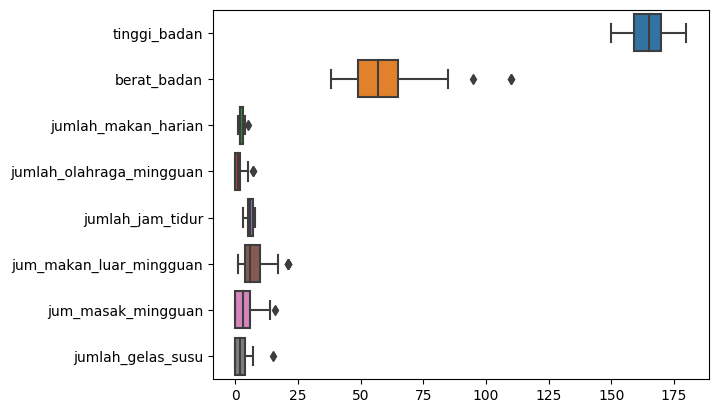

In [ ]:
# Box Plot - Deteksi Outliers
sns.boxplot(data=df_numerik, orient="horizontal")

In [ ]:
df_numerik.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   tinggi_badan              61 non-null     int64  
 1   berat_badan               61 non-null     float64
 2   jumlah_makan_harian       61 non-null     int64  
 3   jumlah_olahraga_mingguan  61 non-null     float64
 4   jumlah_jam_tidur          61 non-null     int64  
 5   jum_makan_luar_mingguan   61 non-null     int64  
 6   jum_masak_mingguan        61 non-null     int64  
 7   jumlah_gelas_susu         61 non-null     int64  
dtypes: float64(2), int64(6)
memory usage: 3.9 KB


Dari delapan feature numerik yang ada, hanya terdapat satu feature yakni jumlah_jam_tidur yang tidak memiliki outliers atau nilai ekstrim. Seluruh nilai outliers yang dimiliki ketujuh feature berada di atas batas atas (upper bound). Selanjutnya handling outliers dilakukan dengan mengganti nilai menjadi batas atas (upper bound).

In [ ]:
import pandas as pd
import numpy as np

# Mendeteksi outliers
Q1 = df_numerik.quantile(0.25)
Q3 = df_numerik.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = (df_numerik < lower_bound) | (df_numerik > upper_bound)

# Mengganti nilai outlier dengan IQR sesuai lokasi outliers
df_numerik = df_numerik.mask(outliers, np.where(df_numerik < lower_bound, lower_bound, upper_bound))

# Menampilkan dataframe setelah deteksi outliers dan penggantian nilai
df_numerik

tinggi_badan  berat_badan  jumlah_makan_harian  jumlah_olahraga_mingguan  \
0            165         49.0                  2.0                       1.0   
1            165         48.0                  2.0                       2.0   
2            175         55.0                  3.0                       2.0   
3            163         56.0                  3.0                       4.0   
4            172         65.0                  3.0                       0.0   
..           ...          ...                  ...                       ...   
56           160         85.0                  2.0                       5.0   
57           165         65.0                  2.0                       4.0   
58           157         48.0                  2.0                       1.0   
59           151         38.0                  2.0                       1.0   
60           160         80.0                  3.0                       0.0   

    jumlah_jam_tidur  jum_makan_luar_mingguan  jum_masak_mingguan  \
0                  5                        3                  11   
1                  6                       14                   0   
2                  6                        5                   0   
3                  6                        5                   7   
4                  7                       10                  11   
..               ...                      ...                 ...   
56                 3                        4                   5   
57                 8                        5                   0   
58                 7                        7                   0   
59                 6                        2                   2   
60                 6                        7                   0   

    jumlah_gelas_susu  
0                   2  
1                   4  
2                   5  
3                   6  
4                   0  
..                ...  
56                  0  
57                  1  
58                  3  
59                  0  
60                  0  

[61 rows x 8 columns]

In [ ]:
df_numerik.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   tinggi_badan              61 non-null     int64  
 1   berat_badan               61 non-null     float64
 2   jumlah_makan_harian       61 non-null     float64
 3   jumlah_olahraga_mingguan  61 non-null     float64
 4   jumlah_jam_tidur          61 non-null     int64  
 5   jum_makan_luar_mingguan   61 non-null     int64  
 6   jum_masak_mingguan        61 non-null     int64  
 7   jumlah_gelas_susu         61 non-null     int64  
dtypes: float64(3), int64(5)
memory usage: 3.9 KB


<Axes: >

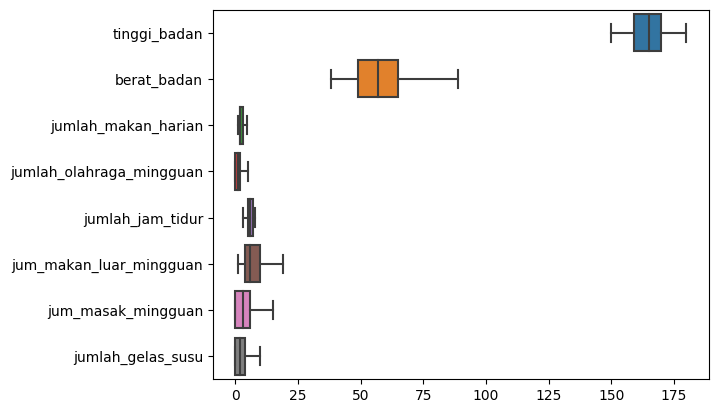

In [ ]:
# Box Plot - Setelah Handling Outliers
sns.boxplot(data=df_numerik, orient="horizontal")

In [ ]:
df_raw

jenis_kelamin  jam_makan_teratur  perokok  diet  konsumsi_obat_rutin  \
0               0                  0        0     0                    0   
1               0                  0        0     0                    0   
2               0                  1        0     0                    1   
3               0                  1        0     1                    0   
4               0                  0        0     0                    0   
..            ...                ...      ...   ...                  ...   
56              0                  0        1     0                    1   
57              0                  0        0     0                    0   
58              1                  1        0     0                    0   
59              1                  0        0     0                    1   
60              1                  0        0     0                    0   

    makan_malam  frekuensi_buah_mingguan  frekuensi_sayur_mingguan  \
0             1                        2                         2   
1             1                        2                         4   
2             0                        3                         3   
3             1                        4                         4   
4             0                        1                         3   
..          ...                      ...                       ...   
56            0                        3                         4   
57            0                        2                         3   
58            0                        4                         2   
59            0                        2                         3   
60            1                        4                         4   

    tingkat_stress  tinggi_badan  berat_badan  jumlah_makan_harian  \
0                2           165         49.0                    2   
1                3           165         48.0                    2   
2                1           175         55.0                    3   
3                2           163         56.0                    3   
4                4           172         65.0                    3   
..             ...           ...          ...                  ...   
56               4           160         85.0                    2   
57               3           165         65.0                    2   
58               2           157         48.0                    2   
59               3           151         38.0                    2   
60               3           160         80.0                    3   

    jumlah_olahraga_mingguan  jumlah_jam_tidur  jum_makan_luar_mingguan  \
0                        1.0                 5                        3   
1                        2.0                 6                       14   
2                        2.0                 6                        5   
3                        4.0                 6                        5   
4                        0.0                 7                       10   
..                       ...               ...                      ...   
56                       5.0                 3                        4   
57                       4.0                 8                        5   
58                       1.0                 7                        7   
59                       1.0                 6                        2   
60                       0.0                 6                        7   

    jum_masak_mingguan  jumlah_gelas_susu  kategori_tubuh  
0                   11                  2               1  
1                    0                  4               1  
2                    0                  5               1  
3                    7                  6               0  
4                   11                  0               0  
..                 ...                ...             ...  
56                   5                  0               1  
57                   0      

Dari boxplot di atas sudah tidak ditemukan adanya outliers pada feature numerik.

# Exploratory Data Analysis

In [ ]:
!pip install pandas-profiling[notebook]
from pandas_profiling import ProfileReport
profile = ProfileReport(df_raw, title="Report")
profile

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 352.3/352.3 kB 34.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 13.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 48.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 26.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.4/455.4 kB 30.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 69.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 57.5 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=676ffc24d75bd6559099de51626b4682541f0c98dbfd0800bdcec24604951b57
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb

<ipython-input-16-b425faff4abc>:2: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Statistika Deskriptif

In [ ]:
df_numerik.describe()

tinggi_badan  berat_badan  jumlah_makan_harian  \
count     61.000000    61.000000            61.000000   
mean     164.803279    59.418033             2.401639   
std        7.604428    12.958003             0.637833   
min      150.000000    38.000000             1.000000   
25%      159.000000    49.000000             2.000000   
50%      165.000000    57.000000             2.000000   
75%      170.000000    65.000000             3.000000   
max      180.000000    89.000000             4.500000   

       jumlah_olahraga_mingguan  jumlah_jam_tidur  jum_makan_luar_mingguan  \
count                 61.000000         61.000000                61.000000   
mean                   1.614754          5.852459                 7.491803   
std                    1.456003          1.180905                 4.982044   
min                    0.000000          3.000000                 1.000000   
25%                    0.000000          5.000000                 4.000000   
50%                    1.000000          6.000000                 6.000000   
75%                    2.000000          7.000000                10.000000   
max                    5.000000          8.000000                19.000000   

       jum_masak_mingguan  jumlah_gelas_susu  
count           61.000000           61.00000  
mean             3.639344            2.42623  
std              4.012617            2.59139  
min              0.000000            0.00000  
25%              0.000000            0.00000  
50%              3.000000            2.00000  
75%              6.000000            4.00000  
max             15.000000           10.00000

## Data Visualization

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

### a. Biner Data Visualization

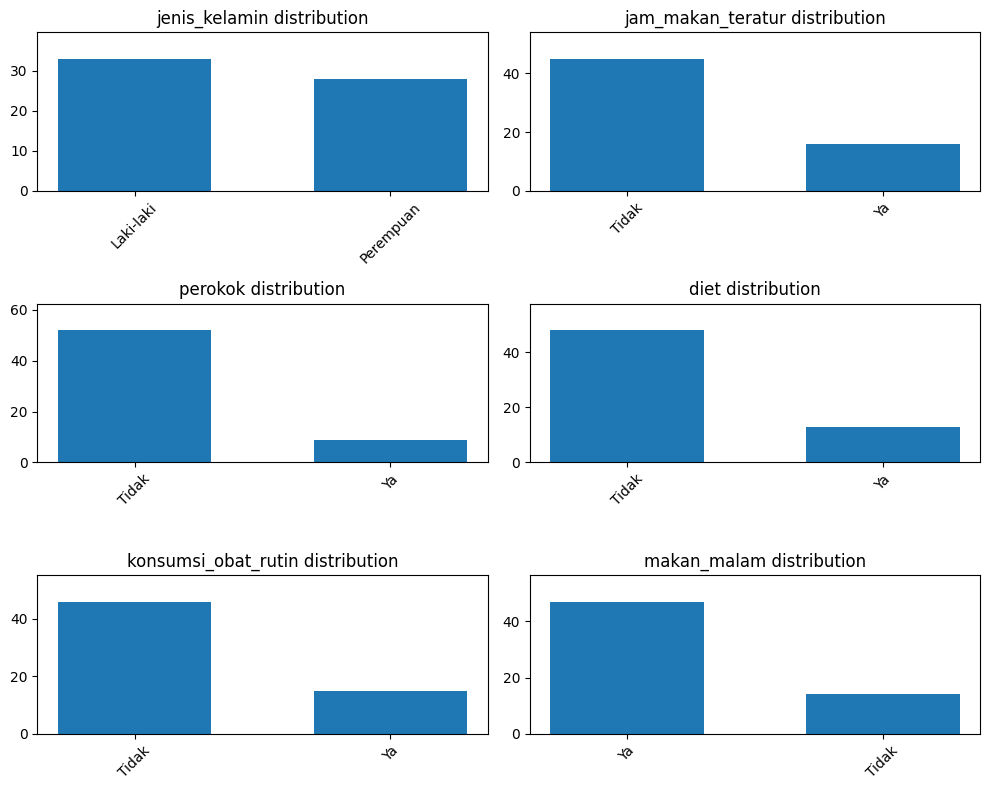

In [ ]:
# List of variables for bar plots
variables = ['jenis_kelamin', 'jam_makan_teratur', 'perokok', 'diet', 'konsumsi_obat_rutin', 'makan_malam']

# Define the new labels
new_labels = {
    'jenis_kelamin': {0: 'Laki-laki', 1: 'Perempuan'},
    'jam_makan_teratur': {0: 'Tidak', 1: 'Ya'},
    'perokok': {0: 'Tidak', 1: 'Ya'},
    'diet': {0: 'Tidak', 1: 'Ya'},
    'konsumsi_obat_rutin': {0: 'Tidak', 1: 'Ya'},
    'makan_malam': {0: 'Tidak', 1: 'Ya'}
}

# Calculate the number of rows and columns for the subplot grid
num_rows = (len(variables) - 1) // 2 + 1
num_cols = min(len(variables), 2)

# Create the subplot grid
fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 8))

# Generate bar plots for each variable
for i, var in enumerate(variables):
    # Calculate the value counts of each category
    counts = df_raw[var].value_counts().rename(new_labels[var])

    # Get the labels and sizes for the bar plot
    labels = counts.index
    sizes = counts.values

    # Calculate the position in the subplot grid
    row = i // num_cols
    col = i % num_cols

    # Create a bar plot in the appropriate subplot
    ax = axes[row, col]
    ax.bar(labels, sizes, width=0.6)  # Adjust the width as needed

    # Set the title of the chart
    ax.set_title(f'{var} distribution')

    # Rotate x-axis labels if needed
    ax.tick_params(axis='x', rotation=45)

    # Adjust the height of the bars
    ax.set_ylim(top=max(sizes) * 1.2)

# Adjust spacing between subplots
plt.tight_layout()

# Display the chart
plt.show()

### b. Ordinal Data Visualization

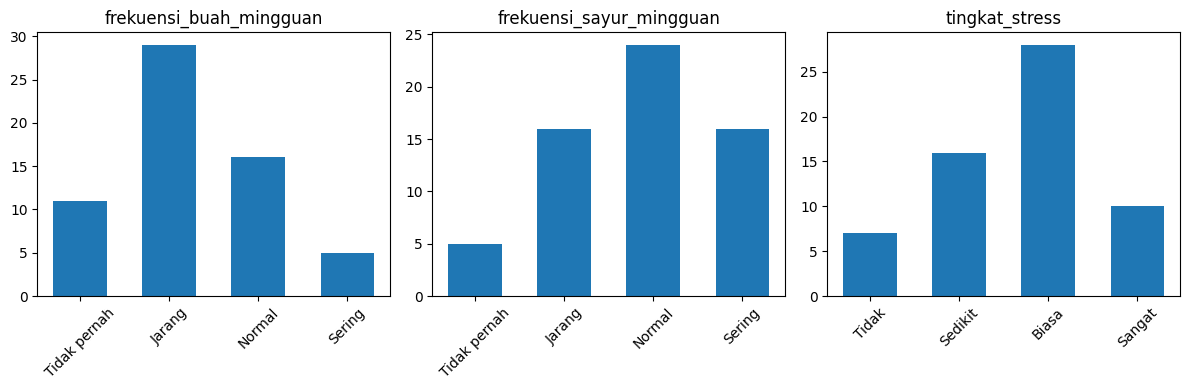

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming you have a DataFrame named df_raw with the desired columns

# List of variables for bar charts
variables = ['frekuensi_buah_mingguan', 'frekuensi_sayur_mingguan', 'tingkat_stress']

# Define the labels for the x-axis
x_labels = {
    'frekuensi_buah_mingguan': {1: 'Tidak pernah', 2: 'Jarang', 3: 'Normal', 4: 'Sering'},
    'frekuensi_sayur_mingguan': {1: 'Tidak pernah', 2: 'Jarang', 3: 'Normal', 4: 'Sering'},
    'tingkat_stress': {1: 'Tidak', 2: 'Sedikit', 3: 'Biasa', 4: 'Sangat'}
}

# Calculate the number of columns for the subplot grid
num_cols = len(variables)

# Create the subplot grid
fig, axes = plt.subplots(1, num_cols, figsize=(12, 4))

# Generate bar charts for each variable
for i, var in enumerate(variables):
    # Calculate the value counts of each category
    counts = df_raw[var].value_counts()

    # Get the labels and sizes for the bar chart
    labels = counts.index
    sizes = counts.values

    # Create a bar chart in the appropriate subplot
    ax = axes[i]
    ax.bar(labels, sizes, width=0.6)

    # Set the title of the chart
    ax.set_title(var)

    # Rotate x-axis labels if needed
    ax.tick_params(axis='x', rotation=45)

    # Remove the float labels
    ax.xaxis.set_major_locator(plt.MaxNLocator(integer=True))

    # Add x-axis labels
    ax.set_xticks(labels)
    ax.set_xticklabels([x_labels[var][label] for label in labels])

# Adjust spacing between subplots
plt.tight_layout()

# Display the chart
plt.show()

### c. Numeric Data Visualization

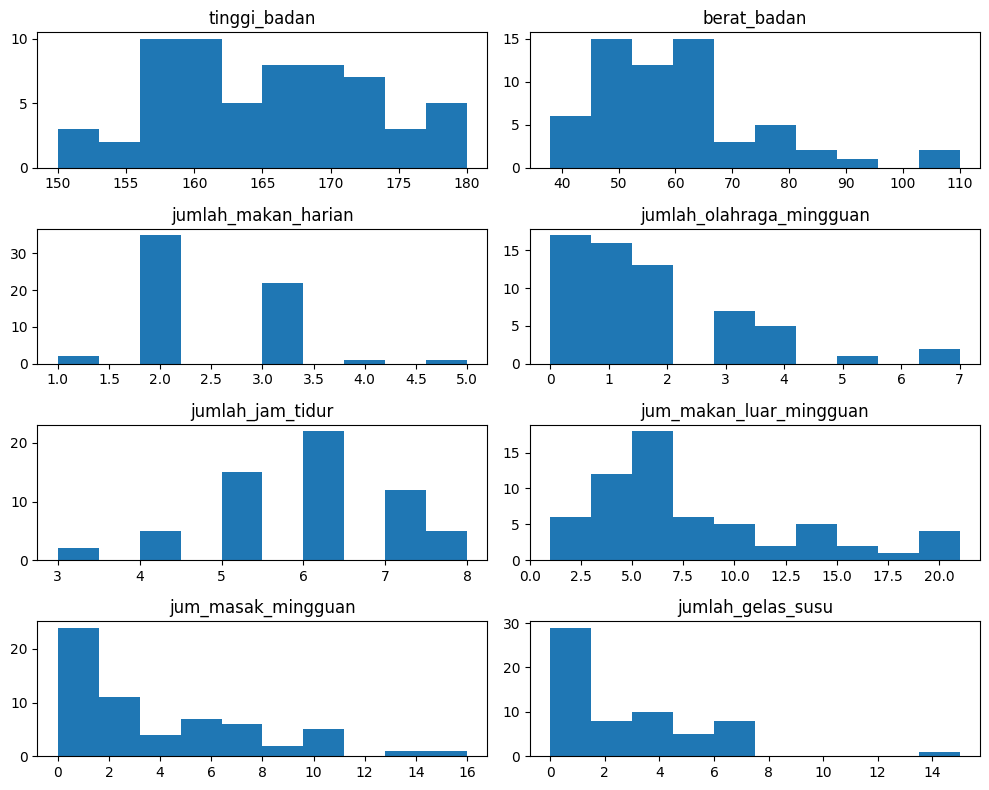

In [ ]:
# List of variables for histograms
variables = ['tinggi_badan', 'berat_badan', 'jumlah_makan_harian', 'jumlah_olahraga_mingguan',
             'jumlah_jam_tidur', 'jum_makan_luar_mingguan', 'jum_masak_mingguan', 'jumlah_gelas_susu']

# Calculate the number of rows and columns for the subplot grid
num_rows = (len(variables) - 1) // 2 + 1
num_cols = min(len(variables), 2)

# Create the subplot grid
fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 8))

# Generate histograms for each variable
for i, var in enumerate(variables):
    # Create a histogram in the appropriate subplot
    if num_rows > 1:
        ax = axes[i // num_cols, i % num_cols]
    else:
        ax = axes[i % num_cols]
    ax.hist(df_raw[var], bins=10)  # Adjust the number of bins as needed

    # Set the title of the chart
    ax.set_title(var)

# Adjust spacing between subplots
plt.tight_layout()

# Display the chart
plt.show()

### d. Target Feature Visualization

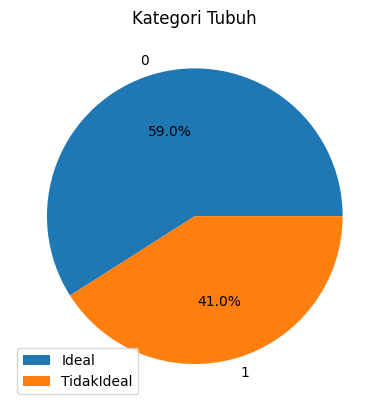

In [ ]:
# Calculate the value counts of each category
counts = df_raw['kategori_tubuh'].value_counts()

# Get the labels and sizes for the pie chart
labels = counts.index
sizes = counts.values

# Create the pie chart
plt.pie(sizes, labels=labels, autopct='%1.1f%%')

# Set the title of the chart
plt.title('Kategori Tubuh')

# Replace labels with custom labels
custom_labels = ['Ideal', 'TidakIdeal']
plt.legend(custom_labels)

# Display the chart
plt.show()

## Correlation Among Features

### Pearson Correlation

<Axes: >

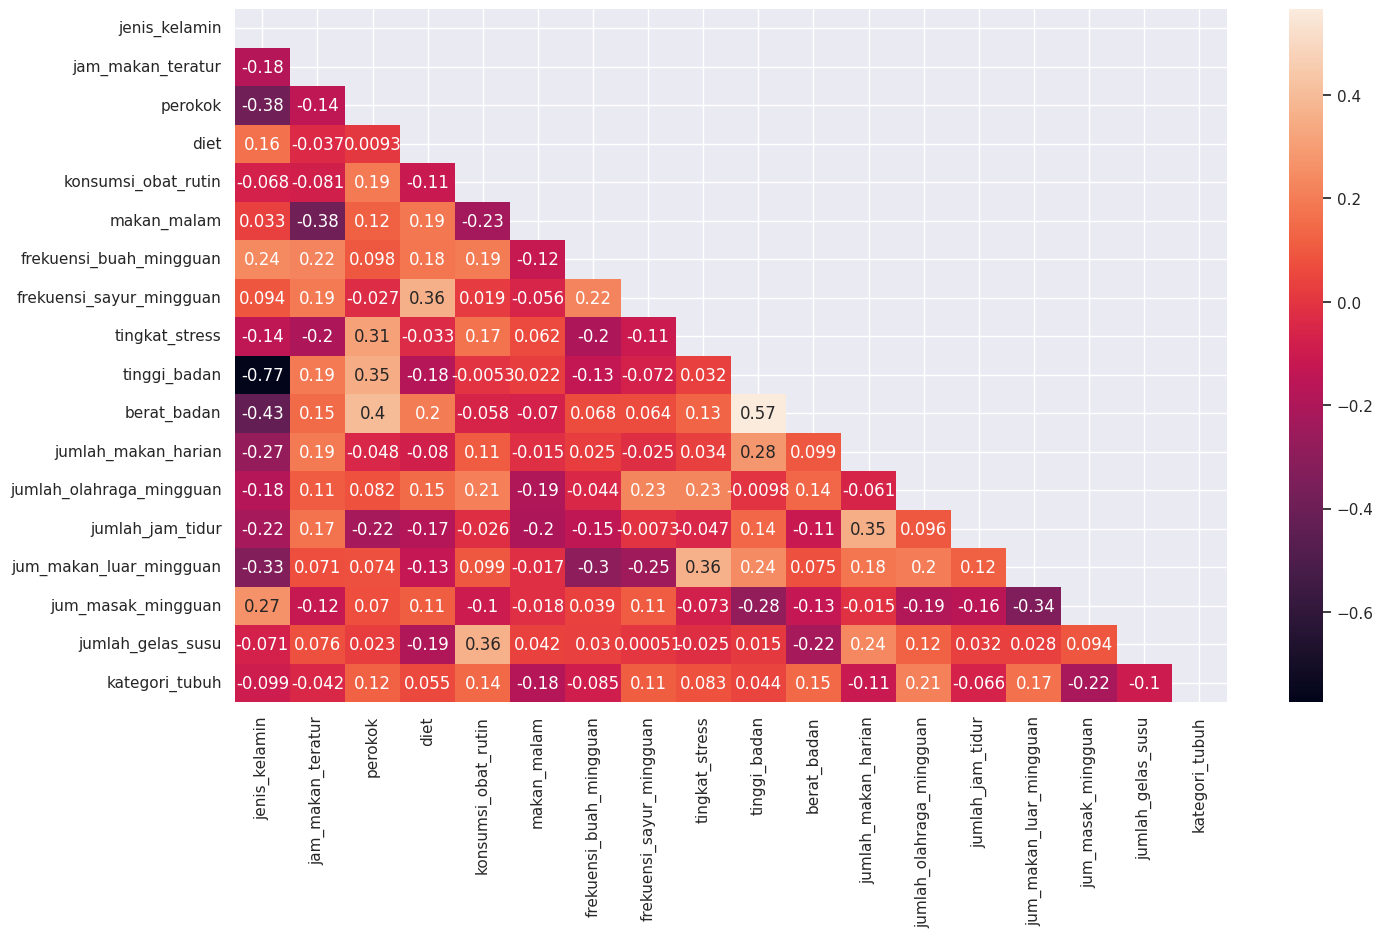

In [ ]:
# Heatmap - Korelasi Pearson
sns.set(rc={'figure.figsize':(16,9)})
# creating mask
mask = np.triu(np.ones_like(df_kualitatif.join(df_numerik).join(df_target).corr()))
sns.heatmap(df_raw.corr(), annot=True, mask=mask)

Kita akan menghapus *feature* yang memiliki korelasi pearson terhadap *target feature (kategori_tubuh)* di bawah 0.1 atau 10%. Feature tersebut adalah;
1. jenis_kelamin
2. perokok
3. diet
4. frekuensi_buah_mingguan
5. tinggi_badan
6. berat_badan
7. jumlah_jam_tidur

# Preprocessing Modelling

## Imbalanced Data Checking

In [ ]:
# Hitung jumlah sampel pada kelas mayoritas dan minoritas
y = df_raw['kategori_tubuh']
count_majority = np.sum(y == 0)
count_minority = np.sum(y == 1)

# Hitung rasio antara jumlah sampel pada kelas minoritas dan mayoritas
ratio = count_minority / count_majority

print('• Jumlah sampel kelas mayoritas:', count_majority)
print('• Jumlah sampel kelas minoritas:', count_minority)
print('•• Rasio antara jumlah sampel kelas minoritas dan mayoritas:', round(ratio,2))
print('Keputusan: ')

if ratio <= 1/10: print('Terjadi Imbalanced Data!')
elif ratio <= 1/20: print('Imbalanced pada Data Sangat Tinggi!')
else: print('Tidak Terjadi Kasus Imbalanced Data')

• Jumlah sampel kelas mayoritas: 36
• Jumlah sampel kelas minoritas: 25
•• Rasio antara jumlah sampel kelas minoritas dan mayoritas: 0.69
Keputusan: 
Tidak Terjadi Kasus Imbalanced Data


## Data Normalization

In [ ]:
from sklearn import preprocessing
d = preprocessing.normalize(df_numerik)
scaled_df = pd.DataFrame(d, columns=df_numerik.columns)
scaled_df

tinggi_badan  berat_badan  jumlah_makan_harian  jumlah_olahraga_mingguan  \
0       0.955980     0.283897             0.011588                  0.005794   
1       0.956060     0.278127             0.011589                  0.011589   
2       0.952593     0.299387             0.016330                  0.010887   
3       0.943032     0.323986             0.017356                  0.023142   
4       0.931596     0.352057             0.016249                  0.000000   
..           ...          ...                  ...                       ...   
56      0.882055     0.468592             0.011026                  0.027564   
57      0.928786     0.365885             0.011258                  0.022516   
58      0.954324     0.291768             0.012157                  0.006078   
59      0.968785     0.243800             0.012832                  0.006416   
60      0.893116     0.446558             0.016746                  0.000000   

    jumlah_jam_tidur  jum_makan_luar_mingguan  jum_masak_mingguan  \
0           0.028969                 0.017381            0.063732   
1           0.034766                 0.081120            0.000000   
2           0.032660                 0.027217            0.000000   
3           0.034713                 0.028927            0.040498   
4           0.037914                 0.054163            0.059579   
..               ...                      ...                 ...   
56          0.016539                 0.022051            0.027564   
57          0.045032                 0.028145            0.000000   
58          0.042549                 0.042549            0.000000   
59          0.038495                 0.012832            0.012832   
60          0.033492                 0.039074            0.000000   

    jumlah_gelas_susu  
0            0.011588  
1            0.023177  
2            0.027217  
3            0.034713  
4            0.000000  
..                ...  
56           0.000000  
57           0.005629  
58           0.018235  
59           0.000000  
60           0.000000  

[61 rows x 8 columns]

In [ ]:
# Menggabungkan data hasil normalisasi dengan feature non-numerik & target feature (Data Bersih - Hasil Preprocessing)
df = df_kualitatif.join(scaled_df)
df = df.join(df_target)
df

jenis_kelamin  jam_makan_teratur  perokok  diet  konsumsi_obat_rutin  \
0               0                  0        0     0                    0   
1               0                  0        0     0                    0   
2               0                  1        0     0                    1   
3               0                  1        0     1                    0   
4               0                  0        0     0                    0   
..            ...                ...      ...   ...                  ...   
56              0                  0        1     0                    1   
57              0                  0        0     0                    0   
58              1                  1        0     0                    0   
59              1                  0        0     0                    1   
60              1                  0        0     0                    0   

    makan_malam  frekuensi_buah_mingguan  frekuensi_sayur_mingguan  \
0             1                        2                         2   
1             1                        2                         4   
2             0                        3                         3   
3             1                        4                         4   
4             0                        1                         3   
..          ...                      ...                       ...   
56            0                        3                         4   
57            0                        2                         3   
58            0                        4                         2   
59            0                        2                         3   
60            1                        4                         4   

    tingkat_stress  tinggi_badan  berat_badan  jumlah_makan_harian  \
0                2      0.955980     0.283897             0.011588   
1                3      0.956060     0.278127             0.011589   
2                1      0.952593     0.299387             0.016330   
3                2      0.943032     0.323986             0.017356   
4                4      0.931596     0.352057             0.016249   
..             ...           ...          ...                  ...   
56               4      0.882055     0.468592             0.011026   
57               3      0.928786     0.365885             0.011258   
58               2      0.954324     0.291768             0.012157   
59               3      0.968785     0.243800             0.012832   
60               3      0.893116     0.446558             0.016746   

    jumlah_olahraga_mingguan  jumlah_jam_tidur  jum_makan_luar_mingguan  \
0                   0.005794          0.028969                 0.017381   
1                   0.011589          0.034766                 0.081120   
2                   0.010887          0.032660                 0.027217   
3                   0.023142          0.034713                 0.028927   
4                   0.000000          0.037914                 0.054163   
..                       ...               ...                      ...   
56                  0.027564          0.016539                 0.022051   
57                  0.022516          0.045032                 0.028145   
58                  0.006078          0.042549                 0.042549   
59                  0.006416          0.038495                 0.012832   
60                  0.000000          0.033492                 0.039074   

    jum_masak_mingguan  jumlah_gelas_susu  kategori_tubuh  
0             0.063732           0.011588               1  
1             0.000000           0.023177               1  
2             0.000000           0.027217               1  
3             0.040498           0.034713               0  
4             0.059579           0.000000               0  
..                 ...                ...             ...  
56            0.027564           0.000000               1  
57            0.000000      

## Feature Selection

In [ ]:
# Feature Selection berdasarkan Korealasi Pearson > 0.1 (Terdapat 5 features yang dihapus)
df_1 = df.drop(['jam_makan_teratur','diet','frekuensi_buah_mingguan','tingkat_stress','berat_badan','jumlah_gelas_susu'],axis=1)
df = df_1

In [ ]:
df.shape

(61, 12)

## Data Splitting

In [ ]:
y = df['kategori_tubuh']
X = df.drop(columns=['kategori_tubuh'], axis=1)
labels = ['Ideal', 'Tidak Ideal']

# Call train test split on the data and capture the results
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

# Melihat dimensi data hasil splitting
print(X_test.shape)
print(X_train.shape)

(13, 11)
(48, 11)


Dilakukan split 20% data testing dan 80% data training. Terdapat 13 data testing dan 48 data training.

## Leave-One-Out Cross-Validation

In [ ]:
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()

# Model Building

## 1. Logistic Regression

### Hyperparameter Tunning

In [ ]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.model_selection import GridSearchCV

# # Define the parameter grid for hyperparameter tuning
# param_grid = {
#     'penalty': ['l1', 'l2'],
#     'C': [0.01, 0.1, 1, 10,100],
# }

# # Create an instance of Logistic Regression
# logreg = LogisticRegression(random_state=42,class_weight='balanced')

# # Create GridSearchCV object with the logistic regression model and parameter grid
# grid_search = GridSearchCV(logreg, param_grid, cv=loo, scoring='accuracy')

# # Fit the GridSearchCV object to the training data
# grid_search.fit(X_train, y_train)

# # Get the best hyperparameters and model
# best_params = grid_search.best_params_
# best_score = grid_search.best_score_
# # Print the best hyperparameters and score
# print('Best Score: ', best_score)
# print("Best Hyperparameters: ", best_params)

### Model Fitting

In [ ]:
clf_lr = LogisticRegression(C=0.01,penalty='l2',class_weight='balanced',random_state=42)
clf_lr.fit(X_train,y_train)

LogisticRegression(C=0.01, class_weight='balanced', random_state=42)

### Cross-Validation

In [ ]:
cv_results_lr = cross_val_score(clf_lr, X_train, y_train, cv=loo)

print("Cross Validation Scores: ", cv_results_lr)
print("Average CV Score: ", cv_results_lr.mean())
print("Number of CV Scores used in Average: ", len(cv_results_lr))

Cross Validation Scores:  [0. 1. 1. 0. 0. 1. 0. 0. 0. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1.
 0. 1. 1. 1. 0. 1. 1. 1. 0. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 0. 1. 0. 0. 0.]
Average CV Score:  0.5625
Number of CV Scores used in Average:  48


## 2. Decision Tree Classifier

### Hyperparameter Tunning

In [ ]:
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.model_selection import GridSearchCV
# # Create an instance of Decision Tree Classifier
# dt = DecisionTreeClassifier(random_state=42)

# parameters = [{
#     'criterion':['gini','entropy'],
#     'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150],
#     'max_leaf_nodes': [2,4,6,10,15,30,40,50,100],
#     'min_samples_split': [2, 3, 4]}]
# grid_search = GridSearchCV(estimator = dt,
#                            param_grid = parameters,
#                            scoring = 'accuracy',
#                            cv = loo,
#                            n_jobs = -1)
# grid_search.fit(X_train, y_train)
# best_accuracy_dtc = grid_search.best_score_
# best_parameters = grid_search.best_params_
# print("Best score:", best_accuracy_dtc)
# print("Best hyperparameters: ", best_parameters)


### Model Fitting

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf_dt = DecisionTreeClassifier(random_state=42,criterion='gini',max_depth=6,max_leaf_nodes=10,min_samples_split=2)
clf_dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=10, random_state=42)

### Cross-Validation

In [ ]:
cv_results_dt = cross_val_score(clf_dt, X_train, y_train, cv=loo)

print("Cross Validation Scores: ", cv_results_dt)
print("Average CV Score: ", cv_results_dt.mean())
print("Number of CV Scores used in Average: ", len(cv_results_dt))

Cross Validation Scores:  [1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1.
 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1.]
Average CV Score:  0.7708333333333334
Number of CV Scores used in Average:  48


## 3. Naive Bayes

### Hyperparameter Tunning

In [ ]:
# from sklearn.naive_bayes import GaussianNB
# from sklearn.model_selection import RandomizedSearchCV
# from scipy.stats import uniform

# param_grid = {'var_smoothing': uniform(loc=1e-9, scale=1e-5)}

# random_search_nv = RandomizedSearchCV(GaussianNB(), param_distributions=param_grid, cv=loo, scoring='accuracy')
# random_search_nv.fit(X_train, y_train)

# best_params = random_search_nv.best_params_
# best_score = random_search_nv.best_score_
# print("Best hyperparameters:", best_params)
# print("Best score:", best_score)

### Model Fitting

In [ ]:
from sklearn.naive_bayes import GaussianNB
clf_nb = GaussianNB(var_smoothing= 4.680993769091634e-06)
clf_nb.fit(X_train,y_train)

GaussianNB(var_smoothing=4.680993769091634e-06)

### Cross-Validation

In [ ]:
cv_results_nb = cross_val_score(clf_nb, X_train, y_train, cv=loo)

print("Cross Validation Scores: ", cv_results_nb)
print("Average CV Score: ", cv_results_nb.mean())
print("Number of CV Scores used in Average: ", len(cv_results_nb))

Cross Validation Scores:  [1. 0. 0. 0. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 0. 1. 0. 0. 1. 0. 1.]
Average CV Score:  0.6666666666666666
Number of CV Scores used in Average:  48


## 4. Random Forest

### Hyperparameter Tunning

In [ ]:
# from sklearn.ensemble import RandomForestClassifier
# classifier_rfc = RandomForestClassifier(random_state=42)
# parameters = [{'n_estimators': [100,200,300],
#                'max_features': ['auto', 'sqrt'],
#                'max_depth': [10,25,50,'none'],
#                'min_samples_leaf': [1, 2],
#                'min_samples_split': [2, 5]}]
# grid_search = GridSearchCV(estimator = classifier_rfc,
#                            param_grid = parameters,
#                            scoring = 'accuracy',
#                            cv = loo,
#                            n_jobs = -1)
# grid_search.fit(X_train, y_train)
# best_accuracy_rfc = grid_search.best_score_
# best_parameters = grid_search.best_params_

# # Cetak hyperparameter terbaik dan akurasi model
# print("Hyperparameter terbaik: ", best_parameters)
# print("Akurasi terbaik: ", best_accuracy_rfc)

### Model Fitting

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf_rf = RandomForestClassifier(random_state=42,n_estimators=100, min_samples_split=2, min_samples_leaf=1, max_features= 'auto', max_depth=10)
clf_rf.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomForestClassifier(max_depth=10, max_features='auto', random_state=42)

### Cross-Validation

In [ ]:
cv_results_rf = cross_val_score(clf_rf, X_train, y_train, cv=loo)

print("Cross Validation Scores: ", cv_results_rf)
print("Average CV Score: ", cv_results_rf.mean())
print("Number of CV Scores used in Average: ", len(cv_results_rf))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Cross Validation Scores:  [1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1.
 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1. 1. 1. 0. 0. 1. 0. 1. 0. 1. 0.]
Average CV Score:  0.6666666666666666
Number of CV Scores used in Average:  48


## 5. KNN

### Hyperparameter Tunning

In [ ]:
# from sklearn.neighbors import KNeighborsClassifier
# knn = KNeighborsClassifier()
# parameters = [{'n_neighbors': [3,5,7,10,13,15], 'weights': ['uniform', 'distance'],
#                 'p': [1,2]}]
# grid_search = GridSearchCV(estimator = knn,
#                            param_grid = parameters,
#                            scoring = 'accuracy',
#                            cv = loo,
#                            n_jobs = -1)
# grid_search.fit(X_train, y_train)
# best_accuracy_knn = grid_search.best_score_
# best_parameters = grid_search.best_params_

# print("Best accuracy score:", best_accuracy_knn)
# print("Best parameters:", best_parameters)

### Model Fitting

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
clf_knn = KNeighborsClassifier(n_neighbors=13,p=1,weights= 'uniform')
clf_knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=13, p=1)

### Cross-Validation

In [ ]:
cv_results_knn = cross_val_score(clf_knn, X_train, y_train, cv=loo)

print("Cross Validation Scores: ", cv_results_knn)
print("Average CV Score: ", cv_results_knn.mean())
print("Number of CV Scores used in Average: ", len(cv_results_knn))

Cross Validation Scores:  [1. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 0.
 1. 1. 0. 1. 1. 0. 1. 0. 0. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 0. 1. 0.]
Average CV Score:  0.6875
Number of CV Scores used in Average:  48


## 6. ANN

### Model Fitting

In [ ]:
from sklearn.neural_network import MLPClassifier
clf_ann = MLPClassifier(random_state=42, solver='adam')
clf_ann.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(random_state=42)

### Cross-Validation

In [ ]:
cv_results_ann = cross_val_score(clf_ann, X_train, y_train, cv=loo)

print("Cross Validation Scores: ", cv_results_ann)
print("Average CV Score: ", cv_results_ann.mean())
print("Number of CV Scores used in Average: ", len(cv_results_ann))

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

Cross Validation Scores:  [1. 1. 1. 0. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1.
 0. 1. 0. 1. 1. 0. 1. 0. 0. 1. 1. 1. 0. 1. 1. 0. 0. 1. 1. 0. 1. 0. 0. 0.]
Average CV Score:  0.6041666666666666
Number of CV Scores used in Average:  48


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


## 7. SVM

### Hyperparameter Tunning

In [ ]:
# from sklearn.svm import SVC
# parameters = [{'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'kernel': ['linear', 'rbf'],
#                 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}]

# svm = SVC()
# grid_search = GridSearchCV(estimator = svm,
#                            param_grid = parameters,
#                            scoring = 'accuracy',
#                            cv = loo,
#                            n_jobs = -1)
# grid_search.fit(X_train, y_train)
# best_accuracy_svm = grid_search.best_score_
# best_parameters = grid_search.best_params_
# print(best_accuracy_svm)
# print(best_parameters)

###  Model Fitting

In [ ]:
from sklearn.svm import SVC
clf_svm = SVC(C=1000, gamma=0.7, kernel= 'rbf')
clf_svm.fit(X_train, y_train)

SVC(C=1000, gamma=0.7)

### Cross-Validation

In [ ]:
cv_results_svm = cross_val_score(clf_svm, X_train, y_train, cv=loo)
print("Cross Validation Scores: ", cv_results_svm)
print("Average CV Score: ", cv_results_svm.mean())
print("Number of CV Scores used in Average: ", len(cv_results_svm))

Cross Validation Scores:  [1. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 0.
 1. 0. 0. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0.]
Average CV Score:  0.7083333333333334
Number of CV Scores used in Average:  48


# Model Summary

## Model Summary Cross Validation

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
import plotly.express as px

data = pd.DataFrame({'model': ['Logistic Regression', 'Decision Tree','Naive Bayes','Random Forest' ,'KNN','ANN','SVM'],
                'accuracy': [round(cv_results_lr.mean(),5),
                        round(cv_results_dt.mean(),5),
                        round(cv_results_nb.mean(),5),
                        round(cv_results_rf.mean(),5),
                        round(cv_results_knn.mean(),5),
                        round(cv_results_ann.mean(),5),
                        round(cv_results_svm.mean(),5)]})

# Sort the data based on f1_score
data = data.sort_values(by='accuracy', ascending=False)

# Melt the dataset to "long-form" format
data_melted = pd. melt(data, id_vars=['model'], var_name='metric', value_name='score')

# Create multi barplot with Plotly
fig = px.bar(data_melted, x='model', y='score', color='metric',
            color_discrete_sequence=['#636EFA', '#EF553B', '#00CC96', '#AB63FA'],
            barmode='group',text_auto='.5')

fig.update_layout(xaxis_tickangle=-55, xaxis_title=None, yaxis_title='Score')
fig.show()


## Model Selection

Dengan Menggunakan Leave-One-Out Cross-Validation untuk mendapatkan akurasi dari tiap model, diperoleh bahwa Model Decision Tree memiliki akurasi tertinggi, sehingga model klasifikasi yang dpilih yakni Decision Tree.

# Decision Tree

## Learning Curve

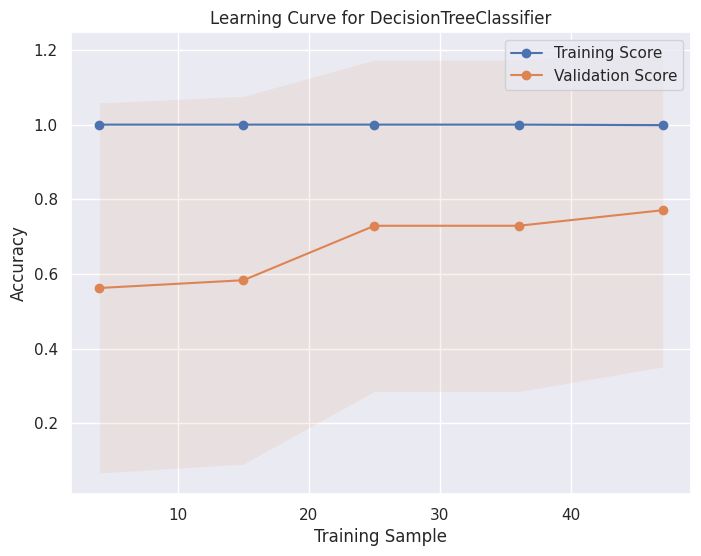

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import learning_curve, ShuffleSplit

fig, ax = plt.subplots(figsize=(8, 6))

train_sizes, train_scores, test_scores = learning_curve(
    clf_dt, X_train, y_train, cv=loo,
    train_sizes=np.linspace(0.1, 1.0, 5), scoring='accuracy', n_jobs=4
)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1)
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1)
plt.plot(train_sizes, train_scores_mean, 'o-', label="Training Score")
plt.plot(train_sizes, test_scores_mean, 'o-', label="Validation Score")
plt.legend()
plt.title(f"Learning Curve for {clf_dt.__class__.__name__}")
plt.xlabel("Training Sample")
plt.ylabel("Accuracy")

plt.show()


## Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix
y_pred_dt = clf_dt.predict(X_test)
cm_dt = confusion_matrix(y_test, y_pred_dt)
print(cm_dt)
# Model Evaluation - Using Metrics Measurements
labels = ['Ideal', 'Tidak Ideal']
print(classification_report(y_test,y_pred_dt, target_names=labels))

[[4 0]
 [1 8]]
              precision    recall  f1-score   support

       Ideal       0.80      1.00      0.89         4
 Tidak Ideal       1.00      0.89      0.94         9

    accuracy                           0.92        13
   macro avg       0.90      0.94      0.92        13
weighted avg       0.94      0.92      0.93        13



In [ ]:
from sklearn import metrics
Accuracy = metrics.accuracy_score(y_test, y_pred_dt)
Precision = metrics.precision_score(y_test, y_pred_dt, average = 'weighted')
Sensitivity_recall = metrics.recall_score(y_test, y_pred_dt, average = 'weighted')
F1_score = metrics.f1_score(y_test, y_pred_dt, average = 'weighted')
#metrics
print({"Accuracy":Accuracy,"Precision":Precision,"Sensitivity_recall":Sensitivity_recall,"F1_score":F1_score})

{'Accuracy': 0.9230769230769231, 'Precision': 0.9384615384615385, 'Sensitivity_recall': 0.9230769230769231, 'F1_score': 0.9250879839115134}


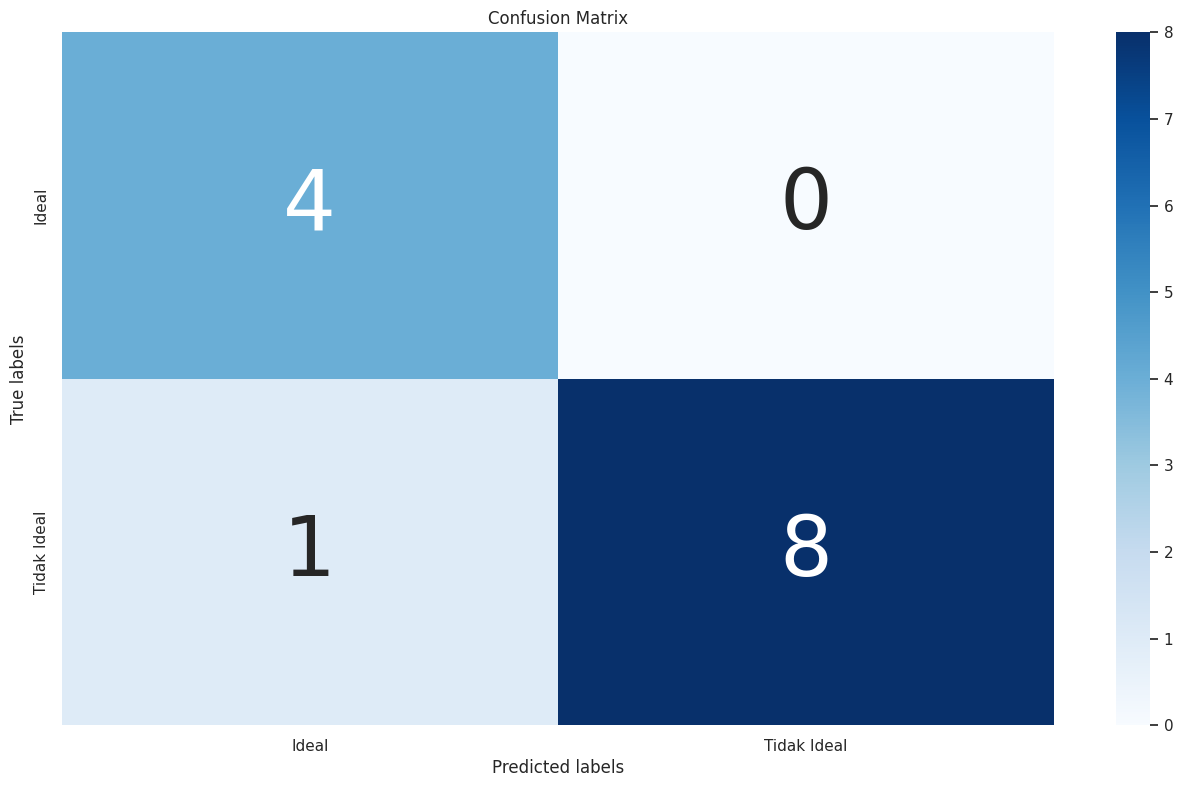

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

ax= plt.subplot()
sns.heatmap(cm_dt, annot=True, fmt='g',cmap = 'Blues', ax=ax, annot_kws={"fontsize": 60});  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['Ideal', 'Tidak Ideal']); ax.yaxis.set_ticklabels(['Ideal', 'Tidak Ideal']);

## F-1 Score

In [ ]:
from sklearn.metrics import f1_score
f1_micro = f1_score(y_test,y_pred_dt, average='micro')
f1_macro = f1_score(y_test,y_pred_dt, average='macro')
f1_weighted = f1_score(y_test,y_pred_dt, average='weighted')
print(f'F1-Score micro: {f1_micro}')
print(f'F1-Score macro: {f1_macro}')
print(f'F1-Score weighted: {f1_weighted}')

F1-Score micro: 0.9230769230769231
F1-Score macro: 0.9150326797385622
F1-Score weighted: 0.9250879839115134


## Roc Curve

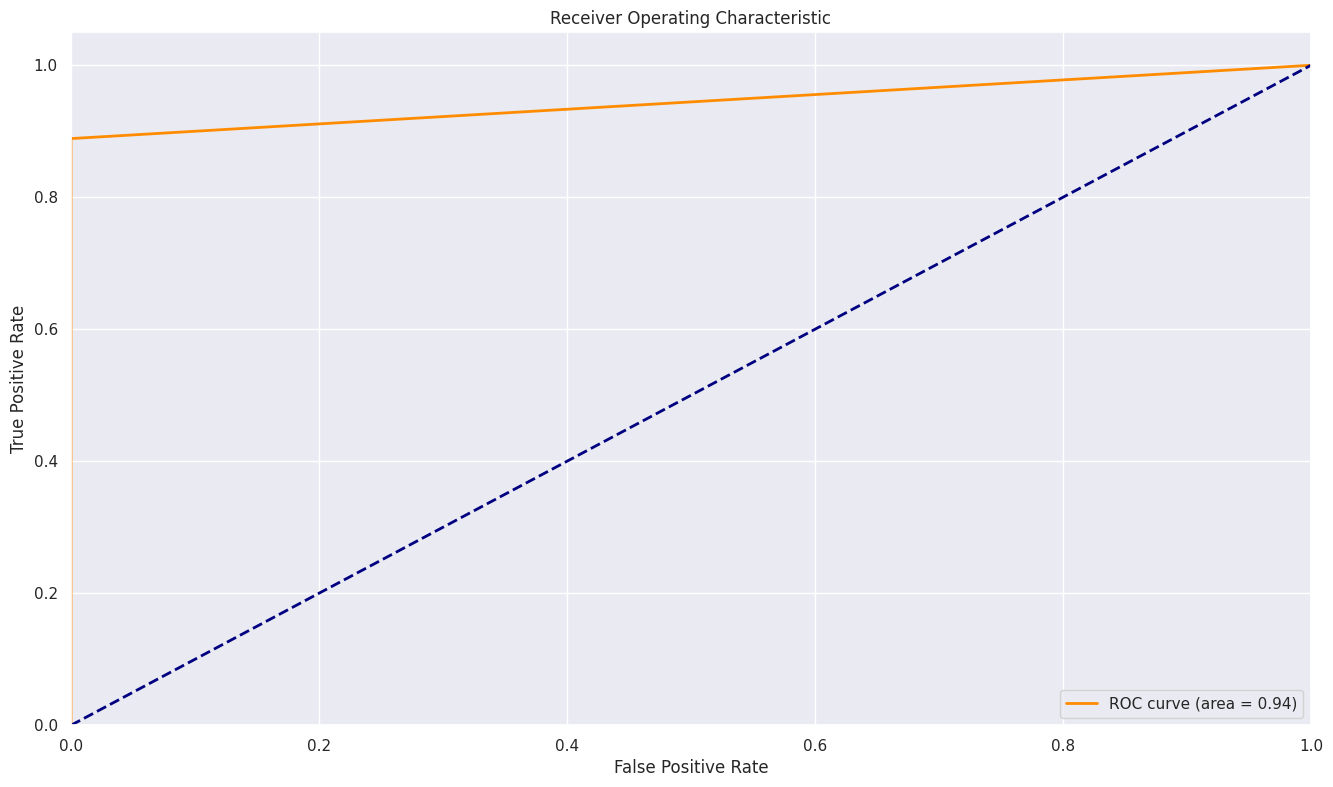

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Misalkan y_true adalah array dengan label sebenarnya dan y_score adalah array dengan skor prediksi
fpr, tpr, thresholds = roc_curve(y_test, y_pred_dt)
roc_auc = auc(fpr, tpr)

# Plotting ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


## Interpret Decision Tree

In [ ]:
import numpy as np

# Nilai X_normalized manual
X_normalized = 0.912

# Menghitung faktor inverse
norms = np.linalg.norm(df_numerik, axis=1)
inverse_factor = norms[0]  # Ambil faktor inverse dari baris pertama (indeks 0)

# Mengembalikan data ke skala aslinya
X_inverse = X_normalized * inverse_factor

# Output
print("Nilai X_inverse:", X_inverse)


Nilai X_inverse: 157.4091921077038


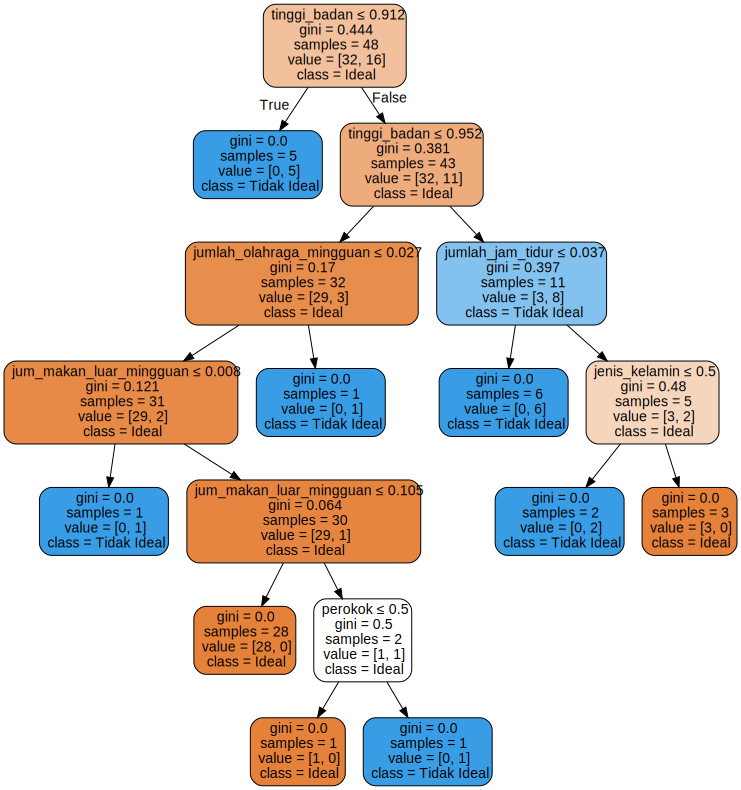

In [ ]:
import graphviz
from sklearn import tree
dot_data = tree.export_graphviz(clf_dt, out_file=None,
                     feature_names=X.columns,
                     class_names=['Ideal','Tidak Ideal'],
                     filled=True, rounded=True,
                     special_characters=True)
graph = graphviz.Source(dot_data)
graph

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.5/91.5 kB 4.9 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names


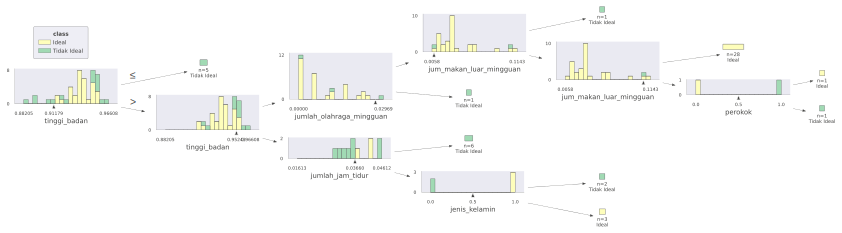

In [ ]:
!pip install dtreeviz
import dtreeviz

# Mengatur konfigurasi font secara eksplisit
viz = dtreeviz.model(clf_dt,
               X_train=X_train,
               y_train=y_train,
               target_name='class',
               feature_names=X.columns,
               class_names=['Ideal','Tidak Ideal'])
viz.view(orientation='LR',leaftype= 'barh',scale=.75)